<a href="https://colab.research.google.com/github/Maleesha-Shavindi/core-machine-learning-models/blob/main/Linear_Regression_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Simple Linear Regression

**Task**: Predict student score given the number of hours spent by
the student for studies
**Input**: Hours studied
**Output**: Score

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("w1_student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


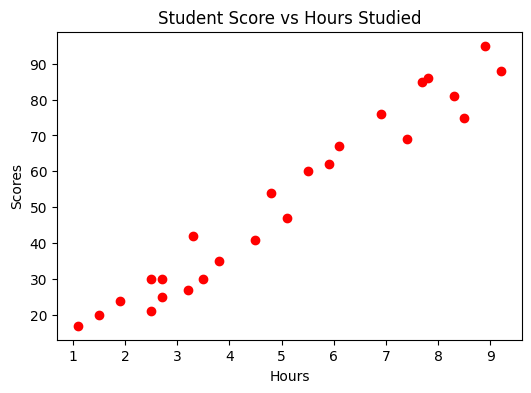

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df["Hours"], df["Scores"], 'ro')
plt.title("Student Score vs Hours Studied")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

Find Coefficient

Calculate the mean of input and output

In [8]:
xmean = np.mean(df["Hours"])
ymean = np.mean(df["Scores"])

Calculate the terms needed for the numerator and denominator of beta

In [9]:
df['xycov']= (df['Hours']-xmean)*(df['Scores']-ymean)
df['xvar']= (df['Hours']-xmean)**2

Calculate Coefficient

In [10]:
slope=df['xycov'].sum() / df['xvar'].sum()
intercept=ymean - (slope*xmean)
print(f'slope={slope}')
print(f'intercept={intercept}')

slope=9.775803390787473
intercept=2.4836734053731817


Making predictions

In [11]:
intercept + slope*7

np.float64(70.9142971408855)

In [12]:
Scores_pred = intercept + slope*df["Hours"]

Compute the score of a student who studied for 7 hours

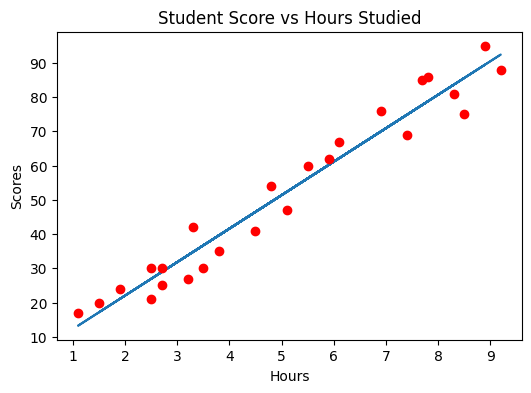

In [13]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], Scores_pred)        #regression line
plt.plot(df["Hours"], df["Scores"], 'ro') #scatter plot showing actual data
plt.title("Student Score vs Hours Studied")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

2. Multiple Linear Regression

**Task**: Predict petrol consumption of a country given various factors such as tax,  distance of highways, and population with driving license
**Input**: Tax, distance of highways, and population with driving license
**Output**: Expected Petrol consumption

In [16]:
df=pd.read_csv("w1_petrol_consumption.csv")

In [17]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [18]:
df.shape

(48, 5)

In [19]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


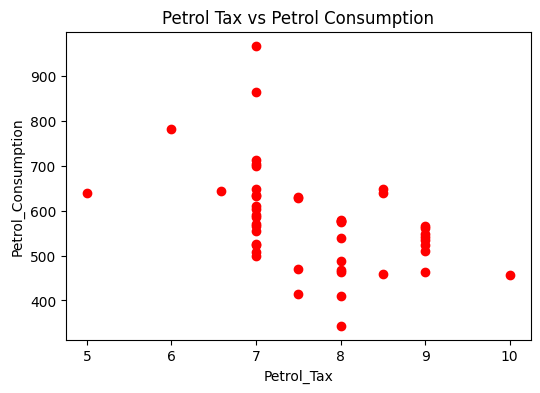

In [22]:
plt.figure(figsize=(6,4))
plt.plot(df["Petrol_tax"], df["Petrol_Consumption"], 'ro')
plt.title("Petrol Tax vs Petrol Consumption")
plt.xlabel("Petrol_Tax")
plt.ylabel("Petrol_Consumption")
plt.show()

Identify Outliers

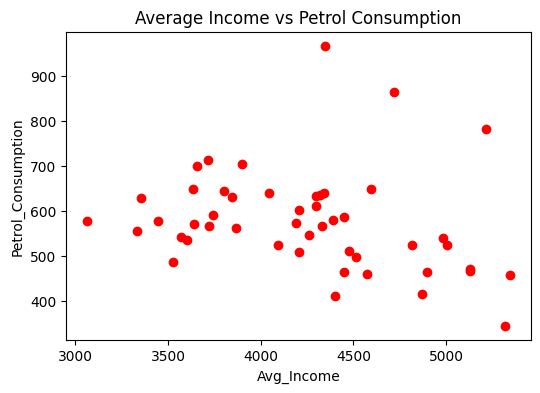

In [24]:
plt.figure(figsize=(6,4))
plt.plot(df["Average_income"], df["Petrol_Consumption"], 'ro')
plt.title("Average Income vs Petrol Consumption")
plt.xlabel("Avg_Income")
plt.ylabel("Petrol_Consumption")
plt.show()

Train the Model

In [28]:
Y = df["Petrol_Consumption"]
X = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_tax']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [32]:
regressor.intercept_

np.float64(361.45087906668397)

In [33]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

Make Predictions

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


Evaluating the Model

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean absolute error: {MAE:.2f}')
print(f'Mean square error: {MSE:.2f}')
print(f'Root mean squared error: {RMSE:.2f}')

Mean absolute error: 53.47
Mean square error: 4083.26
Root mean squared error: 63.90


In [39]:
regressor.score(X_test, Y_test)

0.39136640014305457

In [40]:
regressor.score(X_train, Y_train)

0.7068781342155135